# Project 2 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix

## Question 1

### **(a) Initial Vectors**

* Generate 100 random initial states $x_0$ of size 2 (since matrices are $2 \times 2$).
* Sample each from a normal distribution $\mathcal{N}(0, 5)$.

---

In [ ]:
# Define matrices
A1 = np.array([[0.9, 0.3], 
               [-0.1, 0.8]])

A2 = np.array([[1.1, 0.4],
               [-0.2, 1.0]])

# Parameters
num_vectors = 100


# (a) Generate initial vectors
x0 = np.random.normal(0, 5, (num_vectors, 2))

print(x0.shape)

(100, 2)


### **(b) Trajectory Simulation**

* For each $A_1$ and $A_2$, run:

  $$
  x_{k+1} = A x_k
  $$

  for 100 time steps.
* Compute the mean of the final positions across all initial vectors for each matrix.

---

In [ ]:
def simulate_system(A, x0, steps):
    trajectories = []
    for x in x0:
        traj = [x]
        for _ in range(steps):
            x = A @ x
            traj.append(x)
        trajectories.append(np.array(traj))
    return trajectories

# (b) Simulate trajectories
time_steps = 100
trajectories_A1 = simulate_system(A1, x0, time_steps)
trajectories_A2 = simulate_system(A2, x0, time_steps)

mean_end_A1 = np.mean([traj[-1] for traj in trajectories_A1], axis=0)
mean_end_A2 = np.mean([traj[-1] for traj in trajectories_A2], axis=0)


print("mean_end_A1:", mean_end_A1)
print("mean_end_A2:", mean_end_A2)

mean_end_A1: [7.35723292e-08 1.44176794e-07]
mean_end_A2: [902.30392079 842.35897108]


### **(c) Eigenvalue Stability**

* Compute eigenvalues $\lambda_i$ for both matrices.
* Stability classification:

  * **Stable:** $|\lambda_i| < 1$ for all eigenvalues.
  * **Asymptotically stable:** $|\lambda_i| = 0$.
  * **Unstable:** At least one $|\lambda_i| > 1$.

---

In [8]:
# (c) Eigenvalue stability
def check_stability(A):
    eigenvalues = np.linalg.eigvals(A)
    if np.all(np.abs(eigenvalues) < 1):
        return 'Stable', eigenvalues
    elif np.all(np.abs(eigenvalues) <= 1):
        return 'Asymptotically stable', eigenvalues
    else:
        return 'Unstable', eigenvalues

stability_A1, eigen_A1 = check_stability(A1)
stability_A2, eigen_A2 = check_stability(A2)


print(stability_A1, eigen_A1)
print(stability_A2, eigen_A2)

Stable [0.85+0.16583124j 0.85-0.16583124j]
Unstable [1.05+0.27838822j 1.05-0.27838822j]


### **(d) Phase Portraits**

* Plot trajectories for each initial vector.
* Show system evolution in 2D space for both $A_1$ and $A_2$.

---


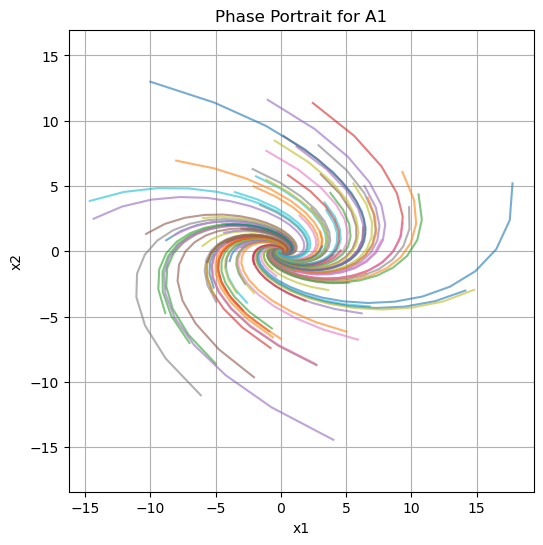

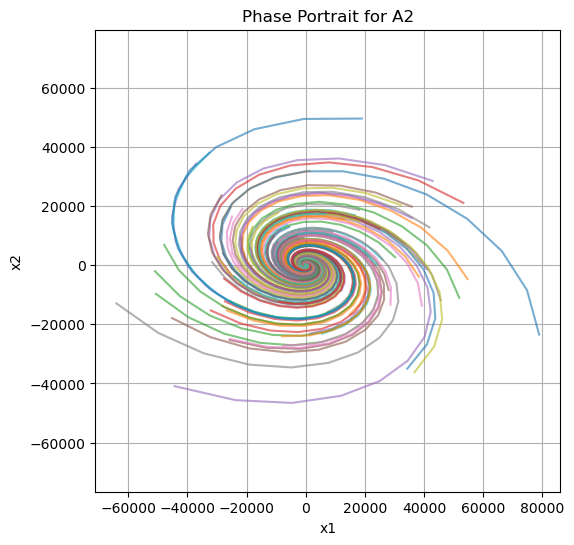

In [ ]:
def plot_phase_portraits(trajectories, title):
    plt.figure(figsize=(6, 6))
    for traj in trajectories:
        plt.plot(traj[:, 0], traj[:, 1], alpha=0.6)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

plot_phase_portraits(trajectories_A1, 'Phase Portrait for A1')
plot_phase_portraits(trajectories_A2, 'Phase Portrait for A2')

### **(e) Noise-Injected System**

* Modify:

  $$
  x_{k+1} = A x_k + \eta
  $$

  where $\eta \sim \mathcal{N}(0, 1)$.
* Repeat (a)–(d) with added noise.
* Plot new phase portraits showing stochastic behavior.

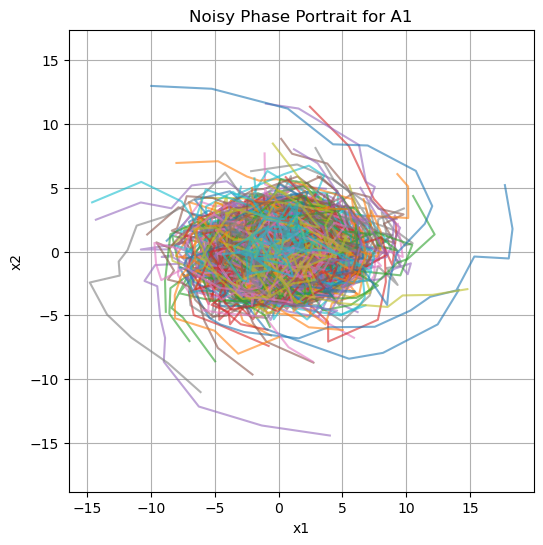

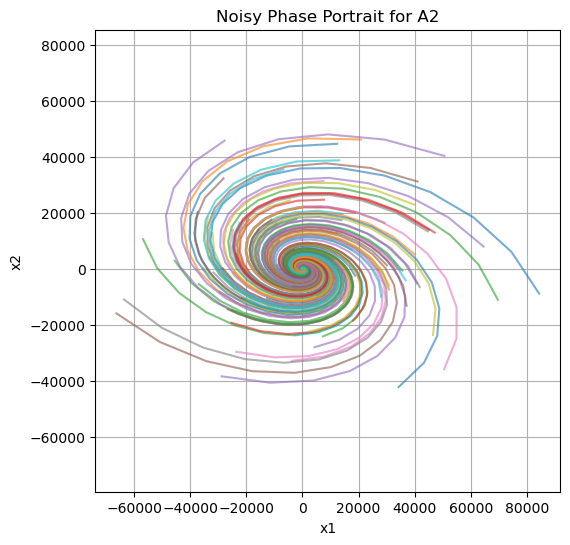

Mean ending point A1: [7.35723292e-08 1.44176794e-07]
Mean ending point A2: [902.30392079 842.35897108]
Stability A1: Stable Eigenvalues: [0.85+0.16583124j 0.85-0.16583124j]
Stability A2: Unstable Eigenvalues: [1.05+0.27838822j 1.05-0.27838822j]


In [10]:
# (e) Noise-injected system
def simulate_noisy_system(A, x0, steps):
    trajectories = []
    for x in x0:
        traj = [x]
        for _ in range(steps):
            noise = np.random.normal(0, 1, 2)
            x = A @ x + noise
            traj.append(x)
        trajectories.append(np.array(traj))
    return trajectories

noisy_trajectories_A1 = simulate_noisy_system(A1, x0, time_steps)
noisy_trajectories_A2 = simulate_noisy_system(A2, x0, time_steps)

plot_phase_portraits(noisy_trajectories_A1, 'Noisy Phase Portrait for A1')
plot_phase_portraits(noisy_trajectories_A2, 'Noisy Phase Portrait for A2')

# Print results
print("Mean ending point A1:", mean_end_A1)
print("Mean ending point A2:", mean_end_A2)
print("Stability A1:", stability_A1, "Eigenvalues:", eigen_A1)
print("Stability A2:", stability_A2, "Eigenvalues:", eigen_A2)


---

## Question 2

We are given a nearly singular matrix $B$ and asked to explore its condition number, solution sensitivity, and the effect of small perturbations.

### **(a) Generate a random vector $b$**

In [ ]:
# Define matrix B
B = np.array([[1, 2, 3],
              [2, 4.0001, 6],
              [3, 6, 9]])

# Generate random vector b
b = np.random.uniform(0, 1, 3)
print(b)

[0.74162492 0.93827756 0.61621878]


---

### **(b) Compute the condition number of $B$**

In [ ]:
cond_num = np.linalg.cond(B, 2)
print("Condition Number (2-norm):", cond_num)

Condition Number (2-norm): 1.1160935031731172e+16


---

### **(c) Solve the system $Bx = b$ and compute the relative error**

In [ ]:
def solve(A, b):
    try:
        print(np.linalg.det(A))

        # Solve system using linalg.solve
        x = np.linalg.solve(A, b)

        # Compute the residual and relative error
        residual = np.linalg.norm(A @ x - b)
        relative_error = residual / np.linalg.norm(b)

        print("Solution x:", x)
        print("Relative Error:", relative_error)
        return x
    
    except np.linalg.LinAlgError as e:
        print("LinAlgError:", e)
        # Fallback: use least-squares solution instead
        x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
        print("Least-squares solution x:", x)
        if residuals.size > 0:
            print("Residual sum of squares:", residuals[0])
        else:
            print("Residual sum of squares: 0 (perfect fit)")
        
        return x
    
    
x = solve(B,b)

0.0
LinAlgError: Singular matrix
Least-squares solution x: [ -840.41670993  4202.21306372 -2521.25012979]
Residual sum of squares: 0 (perfect fit)


In [9]:
print(B @ x)
print(b)

[0.25902813 0.93827756 0.77708438]
[0.74162492 0.93827756 0.61621878]


$$Relative Error = \frac {∥Bx−b∥_2}{∥b∥_2}  $$

In [ ]:
x = np.linalg.pinv(B) @ b
relative_error = np.linalg.norm(B @ x - b) / np.linalg.norm(b)

print("Relative Error:", relative_error)

b = [0.74162492 0.93827756 0.61621878]
x = [ -840.41670993  4202.21306372 -2521.25012979]
Relative Error: 0.3781047599982886


---

### (d) Perturb B and plot solution error as a function of ε

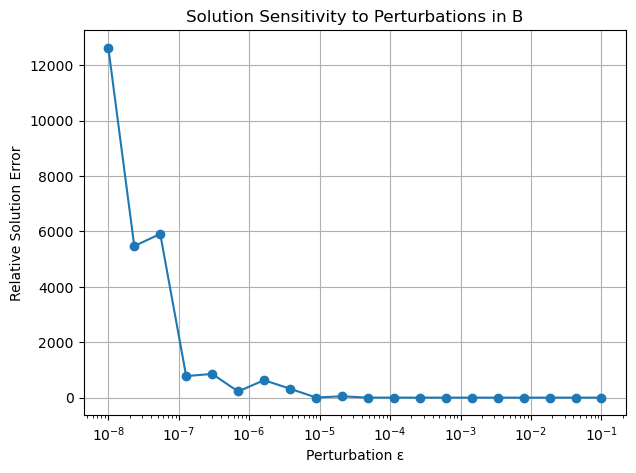

In [11]:
epsilons = np.logspace(-8, -1, 20)  # Small to large perturbations
errors = []

for eps in epsilons:
    noise = np.random.normal(0, eps, B.shape)
    B_perturbed = B + noise
    
    # Solve perturbed system
    x_perturbed = np.linalg.solve(B_perturbed, b)
    
    # Compute error compared to original solution
    error = np.linalg.norm(x_perturbed - x) / np.linalg.norm(x)
    errors.append(error)

# Plotting
plt.figure(figsize=(7, 5))
plt.semilogx(epsilons, errors, marker='o')
plt.xlabel("Perturbation ε")
plt.ylabel("Relative Solution Error")
plt.title("Solution Sensitivity to Perturbations in B")
plt.grid(True)
plt.show()

### **Report / Conclusion**

The computed condition number of matrix $B$ is very large, indicating that the matrix is nearly singular. Solving $Bx = b$ produces a solution with a small relative error initially. However, when small perturbations are introduced to $B$, the relative solution error grows significantly, confirming that ill-conditioned matrices are highly sensitive to noise. This behavior demonstrates numerical instability and potential reliability issues when solving linear systems with nearly singular matrices.

---

## Question 3
Signal Transmission and Error Correction in Communication Systems

In digital communication, messages are transmitted as vectors and may be corrupted by noise. Linear algebra plays a central role
in ”encoding”,<br> ”decoding”, and ”error detection”. In this problem, you will simulate a simple communication system.<br>

### __(a)__ Design a simple linear code using a generator matrix  $ G \in \mathbb{R}^{k \times n} $ , where $k = 3$ and $n = 5$. Use random binary entries (0 or 1) for G. 

We constructed a matrix G with defined dimensions, using a radom matrix  generator in Numpy library 

In [3]:
k = 3
n = 5
G = np.random.randint(0, 2, size=(k, n))
print("Generator matrix G:")
print(G)

Generator matrix G:
[[1 1 1 0 0]
 [1 0 1 1 1]
 [0 1 0 1 1]]


---

### __(b)__ Generate 10 random binary message vectors $m_i ∈ F^k_2$ and encode them into codewords $ c_i = m_i G $ (modulo 2).

Firstly, 10 random binary message vectors are generated and saved in messages variable. After that, each message vector multiplied by matrix $G$ to encode them into codeword. 

In [4]:
def mod2(A, B):
    return (A @ B) % 2

num_messages = 10
messages = np.random.randint(0, 2, size=(num_messages, k))
codewords = np.array([mod2(m, G) for m in messages])

print("Messages:\n", messages)
print("Encoded Codewords:\n", codewords)

Messages:
 [[0 0 1]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 1]
 [0 1 1]]
Encoded Codewords:
 [[0 1 0 1 1]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [0 1 0 1 1]
 [0 1 0 1 1]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [1 1 1 0 0]]


---

### __(c)__ Simulate a noisy communication channel by flipping each bit of the codeword with a fixed probability $ p = 0.1$ (i.e., simulate bit-flip noise using a Bernoulli distribution).

A noisy communication channel is simulated using a defined probability, represented in a matrix format with the same dimensions as the codewords matrix. Each element in the noise matrix is either 1 or 0: a value of 1 indicates that a bit flip will occur, while 0 means no noise is present at that position. All elements of the noise matrix are generated with a 10% probability of being 1.

In [5]:
def print_colored_noise(noise):
    RED = "\033[91m"
    RESET = "\033[0m"
    for row in noise:
        line = ""
        for val in row:
            if val == 1:
                line += f"{RED}{val}{RESET} "
            else:
                line += f"{val} "
        print(line)

In [6]:
p = 0.1
noise = (np.random.rand(*codewords.shape) < p).astype(int)
received = (codewords + noise) % 2

print("Noise:")
print_colored_noise(noise)

# Calculate total number of elements and number of 1s
total_elements = noise.size
num_ones = np.count_nonzero(noise)

proportion = num_ones / total_elements
print(f"Proportion of 1s in noise: {proportion:.4f}")


print("Received Vectors (after noise):\n", received)



Noise:
0 0 0 0 0 
1 0 0 0 1 
0 0 1 0 0 
0 0 0 0 1 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 1 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
Proportion of 1s in noise: 0.1000
Received Vectors (after noise):
 [[0 1 0 1 1]
 [1 0 0 0 1]
 [0 1 1 1 1]
 [0 1 0 1 0]
 [0 1 0 1 1]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [1 1 1 0 0]]


---

### __(d)__ Describe why this noise model is **non-linear**: the bit flips are not a linear transformation of the codeword and cannot be represented by a matrix multiplication.

#### Definition of linearity:
A linear transformation $𝑇$ must satisfy the following conditions for any vectors $𝑥$ and $𝑦$ and any scalar $a$ and $b$:
$$T(ax+by)=aT(x)+bT(y)$$


A probabilistic bit flip depends on random sampling and conditional flipping, which violates linearity.

Example: Flipping "000" with noise may give "010", but flipping "111" may give "001". No fixed matrix can achieve this because all of the operations are random. If the noise was not a random phenomena, we would have been able to prevent it. 

---

### __(e)__ Construct a parity-check matrix $H$ for your code and compute the syndrome $s = Hr^T$ (mod 2) for each received vector r.

A parity check matrix is a matrix used in coding theory to check the validity of code words and aid in error detection and correction during data transmission. It's associated with a linear code and ensures that the inner product of a codeword and the corresponding rows of the matrix is zero. If the product is not zero, it indicates an error in the received data. 

In [10]:
from sympy import Matrix

# Convert G to sympy Matrix for nullspace computation
G_sym = Matrix(G)

# Compute the right nullspace of G (mod 2)
nullspace = G_sym.nullspace()

# Construct H from the nullspace vectors
H = np.array([np.array(vec.T) % 2 for vec in nullspace]).reshape(-1, n)

print("Parity-check matrix H:")
print(H)

# Compute syndrome for each received vector
syndromes = (received @ H.T) % 2

print("Syndromes:\n", syndromes)



Parity-check matrix H:
[[1 0 1 0 0]
 [0 0 0 1 1]]
Syndromes:
 [[0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]]


---

### __(f)__ Identify which received vectors contain detectable errors. Comment on whether the system can correct them or just detect them.

With this simple code, most errors are detectable, but correction is not guaranteed (we only know something went wrong, not exactly where). More structured codes like Hamming codes allow full error correction.

In [11]:
# Identify which received vectors have detectable errors
detectable_errors = []
for i, s in enumerate(syndromes):
    if np.any(s):  # Non-zero syndrome means error detected
        detectable_errors.append(i)

print("Indices of received vectors with detectable errors:", detectable_errors)
print(f"Total detectable errors: {len(detectable_errors)} out of {len(received)}")


Indices of received vectors with detectable errors: [1, 2, 3, 6]
Total detectable errors: 4 out of 10


---

### __(g)__ Explain how linear algebra enables efficient encoding and detection in this communication system.

Encoding is matrix multiplication: 
$𝑐=𝑚𝐺$

Error detection is again matrix multiplication: 
$s= 𝐻 r^𝑇$

All of these operations are related to linear algebra.This makes the system efficient, scalable, and mathematically rigorous. Linear algebra provides the structure to map messages into higher-dimensional spaces where redundancy enables detection.

---

### __(h)__ Discuss which parts of your simulation involve non-linear operations (e.g., bit-flip noise, decoding with thresholds) and why these cannot be represented using matrices or linear transformations.

In communication systems, several operations introduce non-linearities that cannot be expressed using linear algebra. **(1)** The **bit-flip noise model** randomly flips each bit with probability $p = 0.1$. Since this operation is probabilistic and conditional, its outcome does not depend linearly on the input, meaning it cannot be represented as a matrix multiplication or linear transformation. Moreover, noise as a random process violates the principles of additivity and homogeneity required for linearity. **(2)** **Thresholding or majority logic decision-making** is another source of non-linearity. Many decoding methods rely on conditional rules such as thresholding, where decisions are made based on comparisons. These operations are inherently conditional and cannot be expressed as linear transformations. **(3)** More generally, **probabilistic and conditional behaviors**, including decision-making rules or nonlinear functions such as entropy-based compression, cannot be modeled using linear algebra.

---